ЗавданняЖ Потрібно побудувати моделі SVM, Random Forest та інші. Вибрати найкращу. Зробити висновки. Визначити оптимальну кількість класетрів методом ліктя та методом силуетів. Візалізувати кластери методом середніх або будь-яким зручним методом.

Файл з даними завантажити з Kaggle за посиланням: https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset?resource=download


In [1]:
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
PATH = "../../data/students_performance"
fname = os.path.join(PATH, 'Student_performance_data _.csv')
df = pd.read_csv(fname)
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [3]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [6]:
corr_matrix = df.corr()
corr_matrix

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
StudentID,1.000000,-0.042255,-0.014625,-0.012990,-0.002307,0.026976,0.014841,-0.007834,0.003016,-0.003611,-0.020703,-0.005468,0.008011,-0.002697,-0.098500
Age,-0.042255,1.000000,0.044895,-0.028473,0.025099,-0.006800,-0.011511,-0.012076,0.033197,-0.025061,-0.046320,-0.003492,0.013074,0.000275,-0.006250
Gender,-0.014625,0.044895,1.000000,0.016010,0.006771,0.011469,0.021479,-0.031597,0.008065,-0.005964,-0.008897,0.007109,-0.000200,-0.013360,0.022998
Ethnicity,-0.012990,-0.028473,0.016010,1.000000,0.033595,0.007184,-0.025712,-0.017440,0.020922,-0.008927,-0.004484,-0.014627,0.013468,0.027760,-0.023326
ParentalEducation,-0.002307,0.025099,0.006771,0.033595,1.000000,-0.011051,0.036518,-0.017340,-0.017463,0.007479,0.002029,0.039439,0.011960,-0.035854,0.041031
StudyTimeWeekly,0.026976,-0.006800,0.011469,0.007184,-0.011051,1.000000,0.009326,0.028930,0.035800,-0.022860,0.006836,0.007791,-0.016604,0.179275,-0.134131
Absences,0.014841,-0.011511,0.021479,-0.025712,0.036518,0.009326,1.000000,-0.015534,0.002108,0.000360,0.041454,-0.008692,-0.018528,-0.919314,0.728633
Tutoring,-0.007834,-0.012076,-0.031597,-0.017440,-0.017340,0.028930,-0.015534,1.000000,-0.000824,0.004865,0.006278,-0.011385,-0.050898,0.145119,-0.111695
ParentalSupport,0.003016,0.033197,0.008065,0.020922,-0.017463,0.035800,0.002108,-0.000824,1.000000,-0.008381,-0.006176,0.035122,-0.006036,0.190774,-0.136823
Extracurricular,-0.003611,-0.025061,-0.005964,-0.008927,0.007479,-0.022860,0.000360,0.004865,-0.008381,1.000000,-0.011820,-0.014191,-0.007427,0.094078,-0.069733


In [7]:
df['GradeClass'].value_counts()

GradeClass
4.0    1211
3.0     414
2.0     391
1.0     269
0.0     107
Name: count, dtype: int64

In [8]:
# Separate features and target variable
X = df.drop(['StudentID', 'GradeClass'], axis=1)
y = df['GradeClass']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save indexes of test set before scaling
test_indices = X_test.index

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Build SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [10]:
print("SVM Classification Report: \n", classification_report(y_test, y_pred_svm))


SVM Classification Report: 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        22
         1.0       0.58      0.80      0.67        49
         2.0       0.80      0.71      0.75        85
         3.0       0.76      0.79      0.77        86
         4.0       0.92      0.96      0.94       237

    accuracy                           0.82       479
   macro avg       0.61      0.65      0.63       479
weighted avg       0.79      0.82      0.80       479



/home/serhii/Documents/DataScience/DSLectures/DataScience_sandbox/.ds_lec_env/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/serhii/Documents/DataScience/DSLectures/DataScience_sandbox/.ds_lec_env/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/serhii/Documents/DataScience/DSLectures/DataScience_sandbox/.ds_lec_env/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in lab

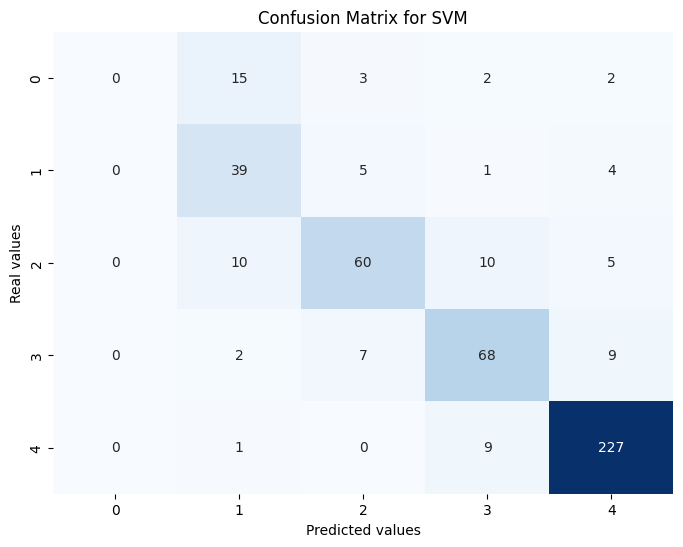

In [11]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted values")
plt.ylabel('Real values')
plt.show()

In [12]:
# Build Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [13]:
print("Random forset Classification Report: \n", classification_report(y_test, y_pred_rf))

Random forset Classification Report: 
               precision    recall  f1-score   support

         0.0       0.82      0.41      0.55        22
         1.0       0.80      0.88      0.83        49
         2.0       0.94      0.87      0.90        85
         3.0       0.89      0.90      0.89        86
         4.0       0.94      0.98      0.96       237

    accuracy                           0.91       479
   macro avg       0.88      0.81      0.83       479
weighted avg       0.91      0.91      0.91       479



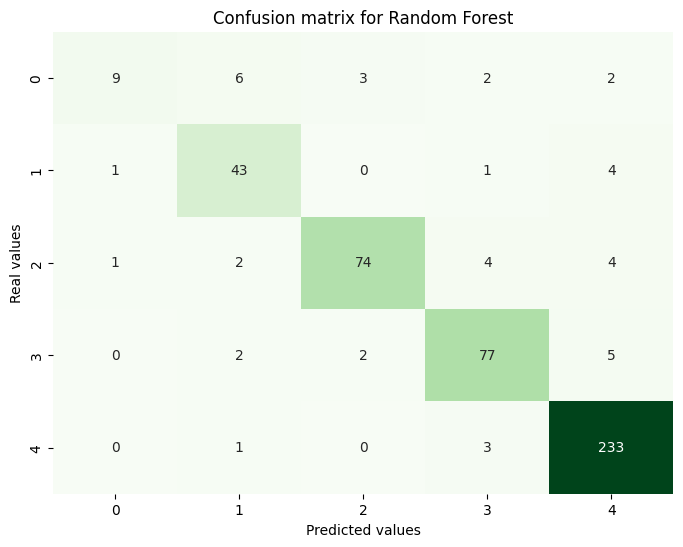

In [14]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Visualisation using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("Confusion matrix for Random Forest")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.show()


In [15]:
from sklearn.linear_model import LogisticRegression

# Create and teach model
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)

# Predictions
y_pred_log_reg = log_reg_model.predict(X_test)

print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Logistic Regression Confusion Matrix: \n", confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        22
         1.0       0.43      0.47      0.45        49
         2.0       0.60      0.62      0.61        85
         3.0       0.71      0.57      0.63        86
         4.0       0.88      0.98      0.93       237

    accuracy                           0.75       479
   macro avg       0.53      0.53      0.52       479
weighted avg       0.71      0.75      0.73       479

Logistic Regression Confusion Matrix: 
 [[  0  15   3   2   2]
 [  4  23  17   1   4]
 [  1  12  53  14   5]
 [  0   2  14  49  21]
 [  0   1   1   3 232]]


In [16]:
from sklearn.ensemble import GradientBoostingClassifier

# Create and teach model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluation of the model
print("Gradient Boosting Classification Report: \n", classification_report(y_test, y_pred_gb))
print("Gradient Boosting Confusion Matrix: \n", confusion_matrix(y_test, y_pred_gb))



Gradient Boosting Classification Report: 
               precision    recall  f1-score   support

         0.0       0.87      0.59      0.70        22
         1.0       0.77      0.88      0.82        49
         2.0       0.94      0.86      0.90        85
         3.0       0.89      0.86      0.88        86
         4.0       0.93      0.97      0.95       237

    accuracy                           0.90       479
   macro avg       0.88      0.83      0.85       479
weighted avg       0.91      0.90      0.90       479

Gradient Boosting Confusion Matrix: 
 [[ 13   2   3   2   2]
 [  1  43   0   1   4]
 [  1   3  73   4   4]
 [  0   3   2  74   7]
 [  0   5   0   2 230]]


Let's try to select features and build models

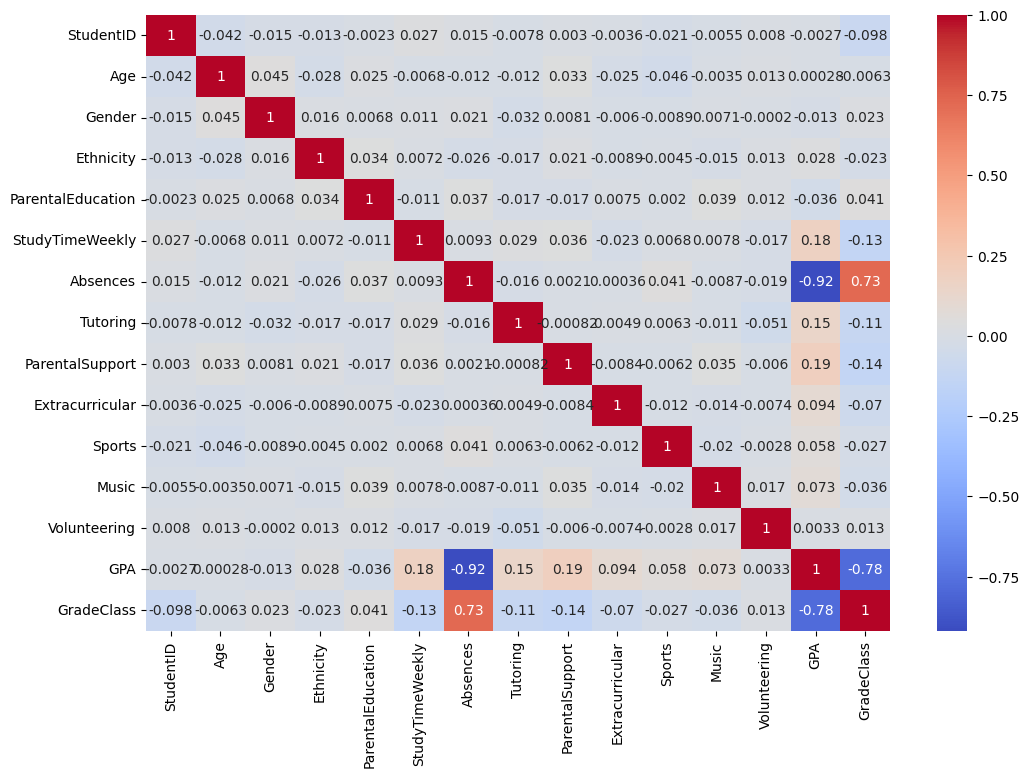

GradeClass           1.000000
GPA                  0.782835
Absences             0.728633
ParentalSupport      0.136823
StudyTimeWeekly      0.134131
Tutoring             0.111695
StudentID            0.098500
Extracurricular      0.069733
ParentalEducation    0.041031
Music                0.036065
Sports               0.026654
Ethnicity            0.023326
Gender               0.022998
Volunteering         0.013156
Age                  0.006250
Name: GradeClass, dtype: float64


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = df.corr()

# Vizualization of correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Select features that have high correlation connection with target variable
target_corr = corr_matrix["GradeClass"].abs().sort_values(ascending=False)
print(target_corr)


На основі кореляційного аналізу ми оберемо ознаки, які мають найвищий кореляційний зв'язок з цільовою змінною GradeClass.
Обираємо 5 ознак:
1. GPA
2. Absences
3. ParentalSupport
4. Study TimeWeekly
5. Tutoring

In [18]:
# Selected features
selected_features = ["GPA", "Absences", "ParentalSupport", "StudyTimeWeekly", "Tutoring"]

# Separation of features and target variable
X = df[selected_features]
y = df['GradeClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("SVM Model Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Model Accuracy: 0.8622129436325678
SVM Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        22
         1.0       0.64      0.90      0.75        49
         2.0       0.92      0.80      0.86        85
         3.0       0.83      0.83      0.83        86
         4.0       0.92      0.97      0.94       237

    accuracy                           0.86       479
   macro avg       0.66      0.70      0.67       479
weighted avg       0.83      0.86      0.84       479



/home/serhii/Documents/DataScience/DSLectures/DataScience_sandbox/.ds_lec_env/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/serhii/Documents/DataScience/DSLectures/DataScience_sandbox/.ds_lec_env/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/serhii/Documents/DataScience/DSLectures/DataScience_sandbox/.ds_lec_env/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in lab

In [20]:
# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random forest Classification report: \n", classification_report(y_test, y_pred_rf))


Random forest Classification report: 
               precision    recall  f1-score   support

         0.0       0.88      0.64      0.74        22
         1.0       0.86      0.86      0.86        49
         2.0       0.94      0.86      0.90        85
         3.0       0.89      0.88      0.89        86
         4.0       0.93      0.99      0.96       237

    accuracy                           0.92       479
   macro avg       0.90      0.84      0.87       479
weighted avg       0.92      0.92      0.91       479



In [21]:
# Logistic regression
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)

print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        22
         1.0       0.52      0.67      0.58        49
         2.0       0.68      0.66      0.67        85
         3.0       0.76      0.59      0.67        86
         4.0       0.88      0.99      0.93       237

    accuracy                           0.78       479
   macro avg       0.57      0.58      0.57       479
weighted avg       0.75      0.78      0.76       479



/home/serhii/Documents/DataScience/DSLectures/DataScience_sandbox/.ds_lec_env/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/serhii/Documents/DataScience/DSLectures/DataScience_sandbox/.ds_lec_env/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/serhii/Documents/DataScience/DSLectures/DataScience_sandbox/.ds_lec_env/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in lab

In [22]:
# Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.64      0.70        22
         1.0       0.86      0.88      0.87        49
         2.0       0.91      0.87      0.89        85
         3.0       0.89      0.87      0.88        86
         4.0       0.93      0.97      0.95       237

    accuracy                           0.91       479
   macro avg       0.88      0.84      0.86       479
weighted avg       0.91      0.91      0.91       479



In [23]:
import numpy as np
random_indices = np.random.choice(len(X_test), size=10, replace=False)

# Getting the correspoinding indices from the original DataFrame using indexes of the test sample
selectet_test_indices = test_indices[random_indices]

# Getting corresponding SdudentID, real and predicted values
student_ids = df.loc[selectet_test_indices, 'StudentID']
true_values = y_test.iloc[random_indices] # real (true) values
predicted_values = y_pred_rf[random_indices] # Predicted values

# Creating DataFrame for results output
df_results = pd.DataFrame({
    'StudentID': student_ids,
    'True_GradeClass': true_values,
    'Predicted_GradeClass': predicted_values
})

print(df_results)


      StudentID  True_GradeClass  Predicted_GradeClass
485        1486              4.0                   4.0
672        1673              1.0                   1.0
196        1197              1.0                   1.0
1360       2361              2.0                   2.0
1382       2383              4.0                   4.0
2316       3317              1.0                   1.0
1660       2661              2.0                   2.0
2052       3053              4.0                   4.0
324        1325              2.0                   2.0
2299       3300              0.0                   4.0


Завдання 2. Задача кластеризації

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [25]:
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [26]:
# Remove columns StudentID and GradeClass
df = df.drop(columns=['StudentID', 'GradeClass'])

In [27]:
# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


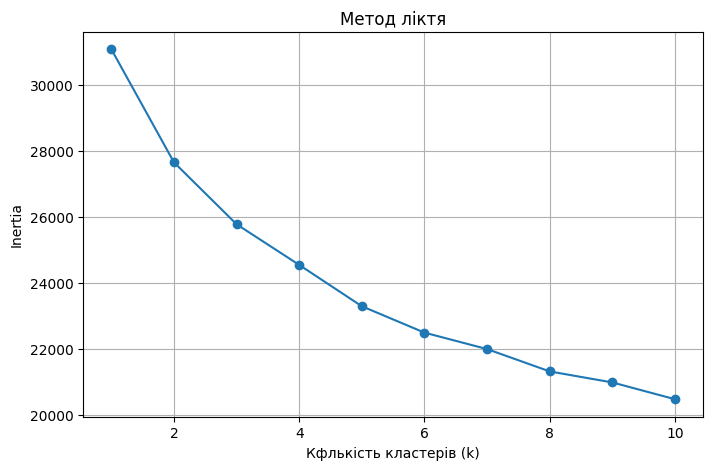

In [28]:
# Elbow method
inertia=[]
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.title("Метод ліктя")
plt.xlabel("Кфлькість кластерів (k)")
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

Обираємо значення з найбільшим згином на графіку. На даному (не чітко виражено k=2 ), щоб було білше видно треба зменшити кількість кроків. Або ж використовувати метод силуетів (як показано нижче)

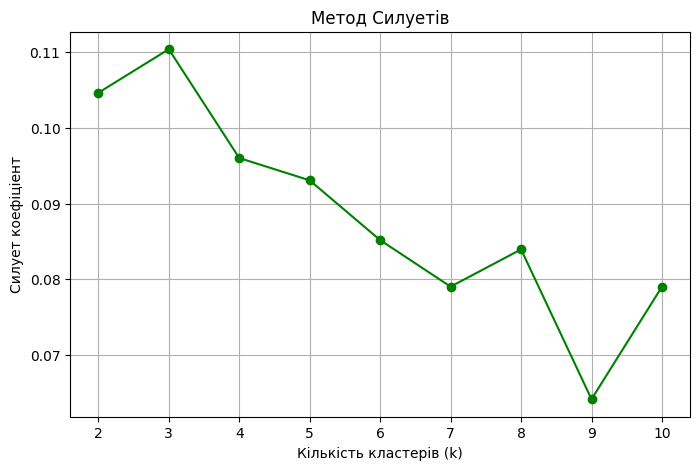

In [29]:
# Silhouette method
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    silhouette = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette)

plt.figure(figsize=(8,5))
plt.plot(range(2,11), silhouette_scores, marker='o', color='green')
plt.title("Метод Силуетів")
plt.xlabel("Кількість кластерів (k)")
plt.ylabel("Силует коефіціент")
plt.grid(True)
plt.show()

Оптимальна точка де коефіціент досягає максимуму. В нашому випадку це k=3 

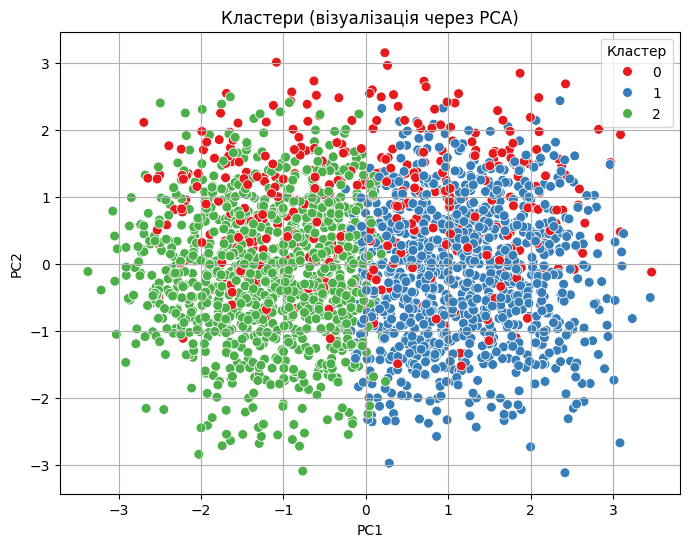

In [30]:
optimal_k=3

# Create clasterisation
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add clasters to data
df['Cluster'] = cluster_labels

# Visualization
from sklearn.decomposition import PCA

# Reduce probability for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster'], palette='Set1', s=50)
plt.title('Кластери (візуалізація через PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Кластер')
plt.grid(True)
plt.show()


Приклад кластеризації

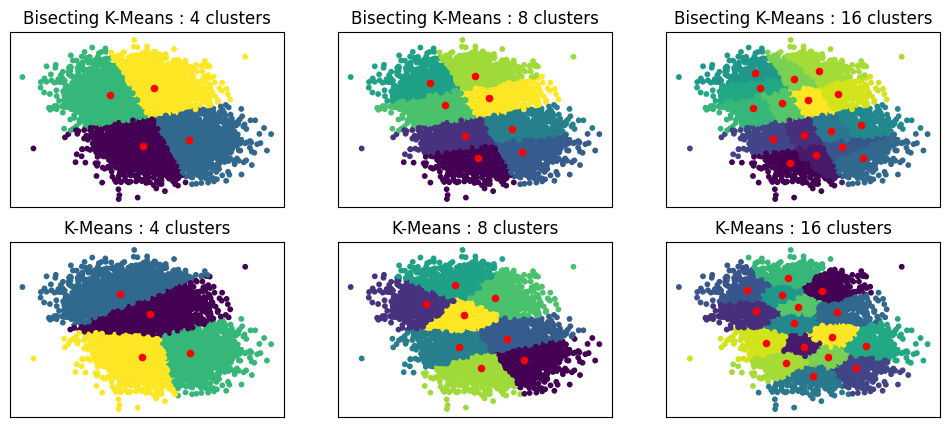

In [33]:
import matplotlib.pyplot as plt

from sklearn.cluster import BisectingKMeans, KMeans
from sklearn.datasets import make_blobs

# Generate sample data
n_samples = 10000
random_state = 0

X, _ = make_blobs(n_samples=n_samples, centers=2, random_state=random_state)

# Number of cluster centers for KMeans and BisectingKMeans

n_clusters_list = [4, 8, 16]

# Algorithms to compare
clustering_algorithms = {
    "Bisecting K-Means": BisectingKMeans, 
    "K-Means": KMeans
}

# Make subplots for each variant
fig, axs = plt.subplots(
    len(clustering_algorithms), len(n_clusters_list), figsize=(12,5)
)

axs = axs.T

for i, (algorithm_name, Algorithm) in enumerate(clustering_algorithms.items()):
    for j, n_clusters in enumerate(n_clusters_list):
        algo = Algorithm(n_clusters=n_clusters, random_state=random_state, n_init=3)
        algo.fit(X)
        centers = algo.cluster_centers_

        axs[j, i].scatter(X[:, 0], X[:, 1], s=10, c=algo.labels_)
        axs[j, i].scatter(centers[:, 0], centers[:, 1], c="r", s=20)

        axs[j, i].set_title(f"{algorithm_name} : {n_clusters} clusters")

# Hide x labels and tick labels for top plots and y ticks for right plots
for ax in axs.flat:
    ax.label_outer()
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()


